In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
prev_app = pd.read_csv(r"C:\Users\Swetha G\Downloads\New Loan\prev_app.csv")

In [5]:
app_data = pd.read_csv(r"C:\Users\Swetha G\Downloads\New Loan\app_data.csv")

In [12]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [6]:
loan_df = pd.merge(prev_app, app_data, how='inner', on='SK_ID_CURR')
loan_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK
0,2327625,328513,Consumer loans,3973.095,17212.5,13945.5,17212.500,SUNDAY,Y,XAP,...,0.0,0.0,0.0,0.0,2383.0,0,0,0.0,0.0,0.0
1,2822183,328513,Consumer loans,2510.370,16605.0,15808.5,16605.000,SUNDAY,Y,XAP,...,0.0,0.0,0.0,0.0,2383.0,0,0,0.0,0.0,0.0
2,1026918,418777,Consumer loans,14291.010,53955.0,50161.5,53955.000,WEDNESDAY,Y,XAP,...,0.0,0.0,0.0,0.0,2733.0,1,0,0.0,0.0,0.0
3,1550721,418777,Cash loans,70054.245,1035000.0,1095111.0,1035000.000,SATURDAY,Y,XNA,...,0.0,0.0,0.0,0.0,2733.0,1,0,0.0,0.0,0.0
4,2717991,418777,Revolving loans,9000.000,0.0,180000.0,111511.575,THURSDAY,Y,XAP,...,0.0,0.0,0.0,0.0,2733.0,1,0,0.0,0.0,0.0


In [7]:
# Bisecting the "loan_df" dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_df[loan_df['TARGET']==0] # Repayers
L1 = loan_df[loan_df['TARGET']==1] # Defaulters

In [13]:
L0.sample(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_x,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK
30014,2548045,142128,Consumer loans,2077.740,16605.000,17086.5,16605.000,MONDAY,Y,XAP,Refused,-1862,Cash through the bank,LIMIT,Unaccompanied,Repeater,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,12,high,POS household with interest,365243,365243,740,1154,1170,0,Cash loans,M,Y,Y,0,98100.0,855000.0,25128.0,855000.0,Family,Working,Higher education,Married,House / apartment,0.019689,21209,1080,5137.0,4745,1,Security staff,2.0,2,2,MONDAY,0,0,0,0,0,0,Security,0.977752,0.22625,0.976975,0.222253,0.977743,0.225918,0.103628,Unknown,0.0,0.0,0.0,0.0,1725.0,1,0,0.0,0.0,0.0
574326,2440171,264726,Consumer loans,9055.035,42489.225,33984.0,42489.225,SUNDAY,Y,XAP,Approved,-753,Cash through the bank,XAP,Unknown,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,4,middle,POS mobile without interest,365243,710,620,620,611,0,Cash loans,F,Y,N,0,157500.0,225000.0,10489.5,225000.0,Unaccompanied,Commercial associate,Incomplete higher,Separated,With parents,0.018850,12195,439,1731.0,3606,1,Unknown,1.0,2,2,THURSDAY,0,0,0,0,0,0,Business Entity Type 3,0.982600,0.16670,0.982600,0.166700,0.982600,0.166700,0.057100,No,2.0,0.0,2.0,0.0,1313.0,1,0,0.0,0.0,0.0


In [14]:
L1.sample(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_x,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK
852150,2837684,393529,Revolving loans,2250.0,45000.0,45000.0,45000.000,WEDNESDAY,Y,XAP,Approved,-196,XNA,XAP,Unaccompanied,Repeater,XNA,Cards,walk-in,Country-wide,Consumer electronics,0,XNA,Card Street,196,152,365243,365243,365243,1,Cash loans,F,N,Y,0,135000.0,545040.0,26509.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,18564,1380,414.0,2115,1,Sales staff,2.0,2,2,WEDNESDAY,0,0,0,0,1,1,Self-employed,0.977735,0.225834,0.977052,0.222099,0.97771,0.225521,0.099976,Unknown,1.0,0.0,1.0,0.0,330.0,1,0,0.0,0.0,0.0
480807,2175185,247413,Cash loans,11250.0,0.0,0.0,111511.575,SUNDAY,Y,XNA,Canceled,-338,XNA,XAP,Unknown,Repeater,XNA,XNA,XNA,Credit and cash offices,XNA,12,XNA,Cash,365243,365243,740,1154,1170,1,Cash loans,F,N,N,0,247500.0,226422.0,20893.5,189000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009657,14574,2544,1729.0,1775,1,Sales staff,2.0,2,2,TUESDAY,0,0,0,0,0,0,Self-employed,0.990600,0.166700,0.990600,0.166700,0.99060,0.166700,0.037800,No,0.0,0.0,0.0,0.0,2427.0,1,0,0.0,0.0,0.0


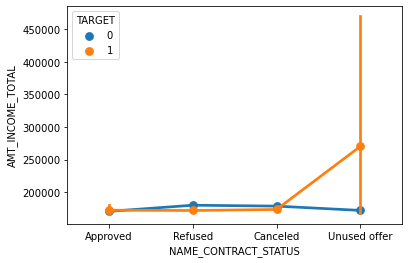

In [20]:
# plotting the relationship between income total and contact status

sns.pointplot(hue = 'TARGET', x = 'NAME_CONTRACT_STATUS', y = 'AMT_INCOME_TOTAL', data = loan_df)


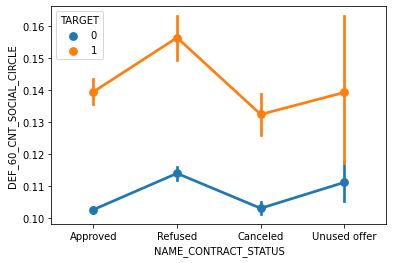

In [21]:
sns.pointplot(data = loan_df,hue = "TARGET",x = "NAME_CONTRACT_STATUS",y = 'DEF_60_CNT_SOCIAL_CIRCLE')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

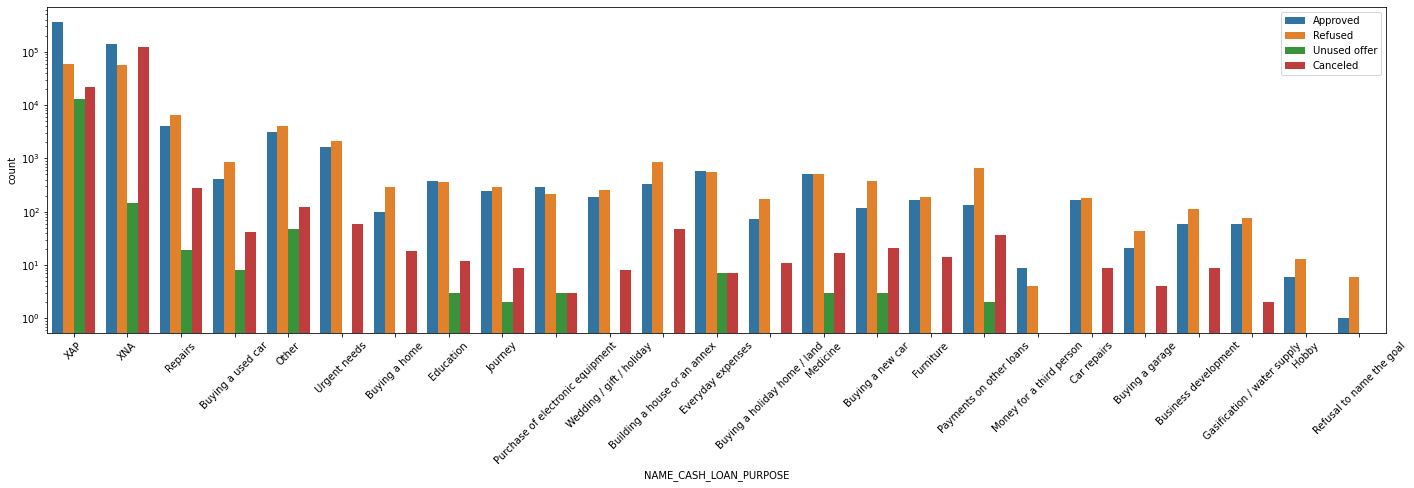

In [31]:
plt.figure(figsize = (24, 6))
sns.countplot('NAME_CASH_LOAN_PURPOSE', data = L0, hue = 'NAME_CONTRACT_STATUS')
plt.yscale('log')
plt.legend(loc = 'upper right')
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

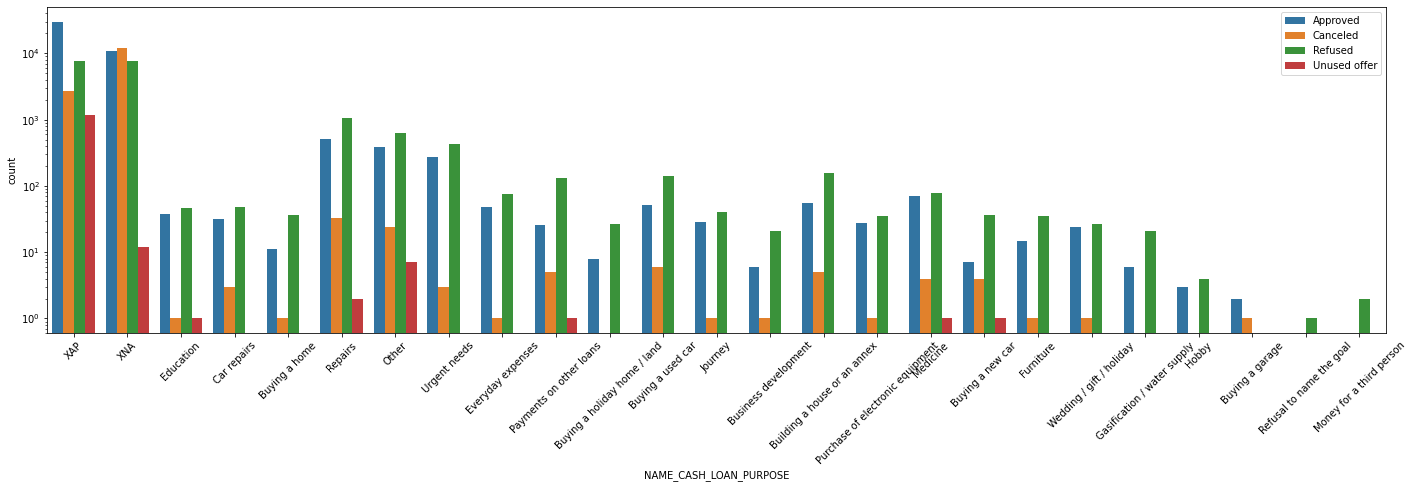

In [29]:
plt.figure(figsize = (24, 6))
sns.countplot('NAME_CASH_LOAN_PURPOSE', data = L1, hue = 'NAME_CONTRACT_STATUS')
plt.yscale('log')
plt.legend(loc = 'upper right')
plt.xticks(rotation = 45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

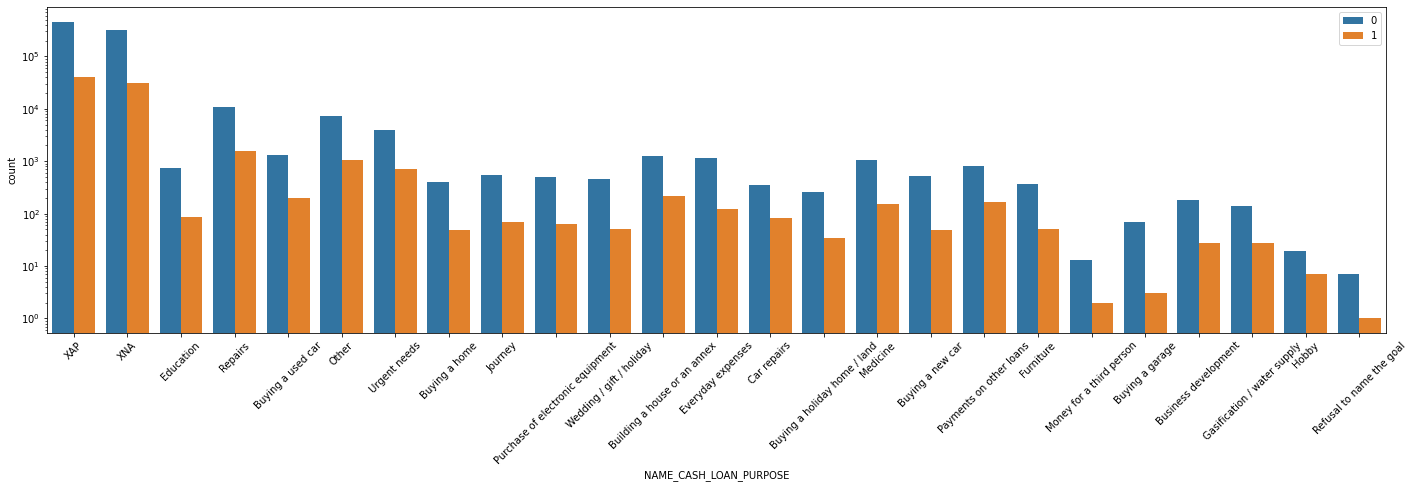

In [30]:
plt.figure(figsize = (24, 6))
sns.countplot('NAME_CASH_LOAN_PURPOSE', data = loan_df, hue = 'TARGET')
plt.yscale('log')
plt.legend(loc = 'upper right')
plt.xticks(rotation = 45)